# 2018-05-14_FEM 1 2D-Stabelement
Dieses Notebook implementiert die grundlegenden Konzepte der linearen FEM mit 2D-Stabelementen mit der Programmiersprache Python 3.6.5. Im Rahmen des __Preprocessing__ werden die Knoten-, Stab- und Randbedingungsinformationen aus korrespondierend Textdateien geladen und verarbeitet. Der __Solver__ lößt dass lineare Gleichungssystem $ [F]=[k]*[u] $ nach den Knotenverschiebungen $ [u] $ auf. Im Anschluss können im __Preprocessing__ mithilfe der Knotenverschiebungen $ [u] $ weitere Informationen, wie zum Beispiel Verformungen oder Spannungen, aus dem Modell abgeleitet werden.

## Preprocessing
### Laden der Python-Module Numpy und Matplotlib
Diese Module ermöglichen die Verarbeitung großer Matrizen und die graphische Darstellung der Berechnungsergebnisse.

In [1]:
import numpy as np # Für das Rechnen mit großen Arrays und Matrizen 
import matplotlib.pyplot as plt # Zum Erstellen von Diagrammen

### Knoten laden
Zu Beginn werden alle Knotenkoordinaten aus einer Textdatei geladen und in einem Diagramm dargestellt. Die Textdatei beinhaltet in jeder Zeile ein Koordinatenpaar, getrennt durch ein Leerzeichen. Weitere Inforamtionen zu den Knoten werden nicht benötigt.

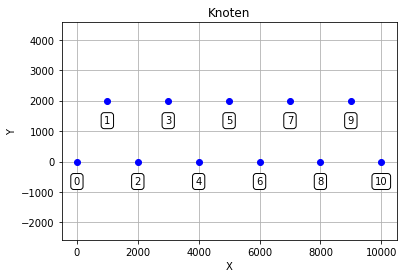

In [2]:
# Knoten laden und Anzahl ermitteln
Knotenkoordinaten = np.loadtxt("C:/Users/Ronny/Documents/DMS/Dokumente/2018-05-14_Knotenkoordinaten Brücke.txt")
AnzahlKnoten = Knotenkoordinaten.shape[0]

# Knoten zeichnen
plt.plot(Knotenkoordinaten[:, 0], Knotenkoordinaten[:,1], 'bo') # Diagramm erstellen

for Knotennummer, Koordinate in enumerate(Knotenkoordinaten): # Knotenbeschriftung erstellen
    plt.annotate(Knotennummer, xy=(Koordinate[0], Koordinate[1]), xytext=(0, -20), 
    textcoords='offset points', va="center", ha="center", bbox=dict(boxstyle="round", fc="w"))
    
plt.gca().set_aspect('equal', 'datalim') # Achsenverhältnis einstellen
plt.grid() # Hilfslinien an
plt.ylabel('Y') # Beschriftung Y-Achse
plt.xlabel('X') # Beschriftung X-Achse
plt.title('Knoten') # Titel
plt.show() # Diagramm zeichnen

### Stabelemente laden und assemblieren
Im Anschluss werden beteiligten Stabelementen ebenfalls aus einer Textdatei geladen. Dazu stehen in der Textdatei in jeder Zeile die Knotennummern, die Querschnittsfläche und der E-Modul des jeweligen Stabelements. Mit diesen Informationen können Element- und Gesamtsteifigkeitsmatrix berechnet werden. Nach der Assemblierung werden alle Stäbe in einem Diagramm dargestellt.

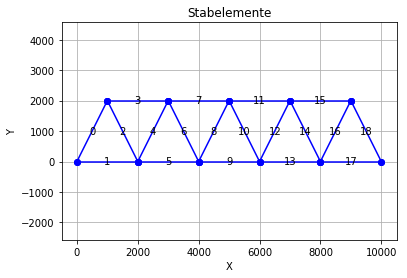

In [25]:
Stabelemente = np.loadtxt("C:/Users/Ronny/Documents/DMS/Dokumente/2018-05-14_Stabelemente Brücke.txt")

GSM = np.zeros((2 * AnzahlKnoten, 2 * AnzahlKnoten)) # Gesamtsteifigkeitsmatrix erzeugen

for Stabnummer, Stab in enumerate(Stabelemente): # Eigenschaften für jeden Stab berechnen
    # TODO - Schleife liefert falsche Stabdaten, falls Geometrie nur aus einem Element besteht
    K1 = Knotenkoordinaten[int(Stab[0])] # Koordinaten von 1. Knoten
    K2 = Knotenkoordinaten[int(Stab[1])] # Koordinaten von 2. Knoten
    A = Stab[2] # Querschnittsfläche
    E = Stab[3] # E-Modul
    l = np.linalg.norm(K2 - K1) # Länge
    alpha = np.arctan2((K2-K1)[1], (K2-K1)[0]) # Winkel
    
    ESM = ((E*A)/l)*np.array([ # Elementsteifigkeitsmatrix
        [np.cos(alpha)**2,np.sin(alpha)*np.cos(alpha),-np.cos(alpha)**2,-np.sin(alpha)*np.cos(alpha)],
        [np.sin(alpha)*np.cos(alpha),np.sin(alpha)**2,-np.sin(alpha)*np.cos(alpha),-np.sin(alpha)**2],
        [-np.cos(alpha)**2,-np.sin(alpha)*np.cos(alpha),np.cos(alpha)**2,np.sin(alpha)*np.cos(alpha)],
        [-np.sin(alpha)*np.cos(alpha),-np.sin(alpha)**2,np.sin(alpha)*np.cos(alpha),np.sin(alpha)**2]])
   
    # Assemblierung
    GSM[2 * int(Stab[0]) : 2 * int(Stab[0]) + 2, 2 * int(Stab[0]) : 2 * int(Stab[0]) + 2] += ESM[0:2, 0:2] # Block 1
    GSM[2 * int(Stab[0]) : 2 * int(Stab[0]) + 2, 2 * int(Stab[1]) : 2 * int(Stab[1]) + 2] += ESM[0:2, 2:4] # Block 2
    GSM[2 * int(Stab[1]) : 2 * int(Stab[1]) + 2, 2 * int(Stab[0]) : 2 * int(Stab[0]) + 2] += ESM[2:4, 0:2] # Block 3
    GSM[2 * int(Stab[1]) : 2 * int(Stab[1]) + 2, 2 * int(Stab[1]) : 2 * int(Stab[1]) + 2] += ESM[2:4, 2:4] # Block 4
        
    # Stab in Diagramm einfügen
    plt.plot([Knotenkoordinaten[int(Stab[0])][0],Knotenkoordinaten[int(Stab[1])][0]],
             [Knotenkoordinaten[int(Stab[0])][1],Knotenkoordinaten[int(Stab[1])][1]], 'bo-')
    
    # Stabbeschriftung erstellen
    plt.annotate(Stabnummer, 
                 xy=(Knotenkoordinaten[int(Stab[0])][0] + (1/2)*(Knotenkoordinaten[int(Stab[1])][0] - 
                     Knotenkoordinaten[int(Stab[0])][0]), 
                     Knotenkoordinaten[int(Stab[0])][1] + (1/2)*(Knotenkoordinaten[int(Stab[1])][1] - 
                     Knotenkoordinaten[int(Stab[0])][1])), 
                 xytext=(0, 0), textcoords='offset points', va="center", ha="center")

# Diagramm einblenden
plt.gca().set_aspect('equal', 'datalim') # Achsenverhältnis einstellen
plt.grid() # Hilfslinien an
plt.ylabel('Y') # Beschriftung Y-Achse
plt.xlabel('X') # Beschriftung X-Achse
plt.title('Stabelemente') # Titel
plt.show() # Diagramm zeichnen

### Verschiebungs- und Kraftrandbedingungen
Bevor das lineare Gleichungssystem  $[F] = [k] * [u]$ nach den Verschiebungen $[u]$ aufgelößt werden kann, müssen die Verschiebungs- und Kraftrandbedingungen aus einer Textdatei geladen und verarbeitet werden. Getrennt durch ein Leerzeichen befinden sich in jeder Zeile die Verschiebungs- und die Kraftrandbedingung einer Richtungskomponente. D.h. in der ersten Zeile stehen die Verschiebungs- und Kraftrandbedingungen in X-Richtung für den ersten Knoten, in der zweiten Zeile die Randbedingungen in Y-Richtung. Erst in der dritten Zeile folgt der nächste Knoten. Unbekannte Verschiebungen werden mit dem Wert "nan" (not a number) eingetragen.

In [26]:
RB = np.loadtxt("C:/Users/Ronny/Documents/DMS/Dokumente/2018-05-14_Randbedingungen Brücke.txt")
VerschiebungsRB = RB[:,[0]] # Verschiebungsrandbedingungen auslesen
KraftRB = RB[:,[1]] # Kraftrandbedingungen auslesen
GSMKopie = np.copy(GSM) # Kopie der GSM erstellen

# Einbau Verschiebungsrandbedingungen
for Zeile, Randbedingung in enumerate(VerschiebungsRB):
    if not np.isnan(Randbedingung):
    # Falls Verschiebung bekannt
        if Randbedingung != 0:
        # Falls Inhomogene RB
            KraftRB -= Randbedingung * GSMKopie[:, [Zeile]]
            
        # Für alle bekannten Verschiebungsrandbedingungen
        GSMKopie[Zeile, :] = 0
        GSMKopie[:, Zeile] = 0
        GSMKopie[Zeile, Zeile] = 1
        KraftRB[Zeile] = Randbedingung

## Solver
Mit einem Solver kann das lineare Gleichungssystem $ [F] = [k]*[u] $ nach den Knontenverschiebungen $ [u] $ aufgelößt werden.

In [27]:
u = np.linalg.solve(GSMKopie, KraftRB) # Auflösen des Gleichunssystems nach den Verschiebungen [u]
print(u) # Ausgabe der Verschiebungen

[[ 0.        ]
 [ 0.        ]
 [ 0.78571429]
 [-0.57919614]
 [ 0.06666667]
 [-1.12505895]
 [ 0.65238095]
 [-1.57763523]
 [ 0.25714286]
 [-1.93497342]
 [ 0.4047619 ]
 [-2.14188223]
 [ 0.55238095]
 [-1.93497342]
 [ 0.15714286]
 [-1.57763523]
 [ 0.74285714]
 [-1.12505895]
 [ 0.02380952]
 [-0.57919614]
 [ 0.80952381]
 [ 0.        ]]


## Postprocessing
Der Verschiebungsvektor $ [u] $ kann im Anschluss zur Berechnung aller weiteren Werte genutzt werden. 
### Berechnung des Kraftvektors
Mit gegebenen Verschiebungen $ [u] $ kann der Kraftvektor $ [F] $ einfach ausgerechnet werden.

In [28]:
F = np.dot(GSM, u) # Berechnung durch Matrizenmultiplikation
print(F) # Ausgabe des Kraftvektors

[[-1.74622983e-10]
 [ 1.40000000e+05]
 [-5.82076609e-11]
 [-1.05501385e-10]
 [-1.16415322e-10]
 [-2.00000000e+04]
 [ 5.82076609e-11]
 [ 3.49245965e-10]
 [-5.82076609e-11]
 [-2.00000000e+04]
 [ 8.73114914e-11]
 [-2.00000000e+05]
 [ 3.49245965e-10]
 [-2.00000000e+04]
 [-1.16415322e-10]
 [-1.45519152e-10]
 [ 0.00000000e+00]
 [-2.00000000e+04]
 [-1.16415322e-10]
 [-1.16415322e-10]
 [-1.45519152e-10]
 [ 1.40000000e+05]]


### Darstellung der Verformung
Zur Darstellung der Verformung des gesamten Modells wird der Verschiebungsvektor $ [u] $, multipliziert mit einem Überhöhungsfaktor, einfach auf die ursprünglichen Knotenkoordinaten addiert. Durch den Überhöhungsfaktor können die Verformungen, trotz ihrer geringen Beträge, gut dargestellt werden. 

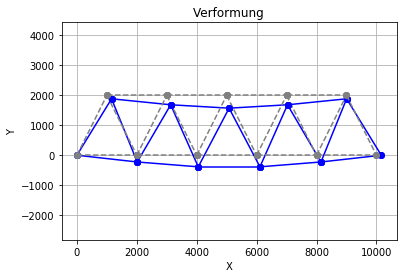

In [29]:
Ueberhoehungsfaktor = 200 # Faktor zur Erhöhung der Verforumung

KnotenkoordinatenNeu = np.copy(Knotenkoordinaten) # Kopie der Knotenkoordinaten erstellen
KnotenkoordinatenNeu[:,[0]] += Ueberhoehungsfaktor * u[0::2] # Verschiebungen in X-Richtung aufaddieren
KnotenkoordinatenNeu[:,[1]] += Ueberhoehungsfaktor * u[1::2] # Verschiebungen in Y-Richtung aufaddieren

for Stabnummer, Stab in enumerate(Stabelemente): # Eigenschaften für jeden Stab berechnen
    # Verformten Stab in Diagramm einfügen
    plt.plot([KnotenkoordinatenNeu[int(Stab[0])][0],KnotenkoordinatenNeu[int(Stab[1])][0]],
             [KnotenkoordinatenNeu[int(Stab[0])][1],KnotenkoordinatenNeu[int(Stab[1])][1]], 'bo-')
    
    # Unverformten Stab in Diagramm einfügen
    plt.plot([Knotenkoordinaten[int(Stab[0])][0],Knotenkoordinaten[int(Stab[1])][0]],
             [Knotenkoordinaten[int(Stab[0])][1],Knotenkoordinaten[int(Stab[1])][1]], 'o--', color='grey')

# Diagramm einblenden
plt.gca().set_aspect('equal', 'datalim') # Achsenverhältnis einstellen
plt.grid() # Hilfslinien an
plt.ylabel('Y') # Beschriftung Y-Achse
plt.xlabel('X') # Beschriftung X-Achse
plt.title('Verformung') # Titel
plt.show() # Diagramm zeichnen